# <span style="color:red"> LR, DTC, SVC and RFC Model on Wine Dataset/HyperParameterTuning_Wine_Dataset </span>

In [2]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## To Visualize the Decision Tree Model
from sklearn import tree

### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

In [3]:
data= pd.read_csv("desktop/Datasets/winedataset.csv")
data.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [4]:
data['quality'].value_counts()

5    577
6    535
9    247
Name: quality, dtype: int64

# <span style='color:red'> 4.0 Splitting data into independent and dependent features </span>

In [5]:
X= data.iloc[:,:-1]
y=data.iloc[:,-1]


In [6]:
X.head(3)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [7]:
y.head(3)

0    5
1    5
2    5
Name: quality, dtype: int64

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
X_train.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
341,390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9
567,654,8.6,0.47,0.47,2.4,0.074,7.0,29.0,0.99790,3.08,0.46,9.5
769,895,7.1,0.59,0.01,2.3,0.080,27.0,43.0,0.99550,3.42,0.58,10.7
1269,1497,6.9,0.74,0.03,2.3,0.054,7.0,16.0,0.99508,3.45,0.63,11.5
1139,1344,11.5,0.42,0.48,2.6,0.077,8.0,20.0,0.99852,3.09,0.53,11.0


In [10]:
y_train.head()

341     9
567     5
769     6
1269    6
1139    5
Name: quality, dtype: int64

In [11]:
X_test.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
857,1008,8.9,0.350,0.40,3.6,0.110,12.0,24.0,0.99549,3.23,0.70,12.0
993,1163,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0
596,689,8.1,0.380,0.48,1.8,0.157,5.0,17.0,0.99760,3.30,1.05,9.4
102,112,8.4,0.600,0.10,2.2,0.085,14.0,111.0,0.99640,3.15,0.66,9.8
445,510,12.4,0.420,0.49,4.6,0.073,19.0,43.0,0.99780,3.02,0.61,9.5


In [12]:
y_test.head()

857    9
993    5
596    5
102    5
445    5
Name: quality, dtype: int64

# <span style='color:red'> 5.0 Feature Scaling for some models </span>

In [13]:
### Creating copy of test and training data for feature scaling
X_train1=X_train
X_train1.head(3)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
341,390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9
567,654,8.6,0.47,0.47,2.4,0.074,7.0,29.0,0.9979,3.08,0.46,9.5
769,895,7.1,0.59,0.01,2.3,0.080,27.0,43.0,0.9955,3.42,0.58,10.7


In [14]:
X_test1=X_test
X_test1.head(3)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
857,1008,8.9,0.350,0.40,3.6,0.110,12.0,24.0,0.99549,3.23,0.70,12.0
993,1163,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0
596,689,8.1,0.380,0.48,1.8,0.157,5.0,17.0,0.99760,3.30,1.05,9.4


In [15]:
y_train1=y_train
y_train1.head(3)

341    9
567    5
769    6
Name: quality, dtype: int64

In [16]:
y_test1=y_test
y_test1.head(3)

857    9
993    5
596    5
Name: quality, dtype: int64

In [17]:
scalar=StandardScaler()
scalar

StandardScaler()

In [18]:
X_train1= scalar.fit_transform(X_train1)
X_train1

array([[-8.71732025e-01, -1.55901763e+00,  1.76931216e+00, ...,
         1.58656678e+00,  1.04003958e+00,  2.22677443e+00],
       [-3.00163819e-01,  1.33664887e-01, -3.07322897e-01, ...,
        -1.46311310e+00, -1.23393896e+00, -8.64908567e-01],
       [ 2.21608672e-01, -7.12676372e-01,  3.48456596e-01, ...,
         6.97076813e-01, -4.75946114e-01,  2.26273669e-01],
       ...,
       [-4.01920280e-01,  2.46510388e-01, -2.52674606e-01, ...,
        -1.80815989e-03, -7.91776467e-01,  4.44099629e-02],
       [ 1.21968800e+00, -1.27690388e+00, -1.01775068e+00, ...,
         3.15866828e-01, -1.36027110e+00, -3.19317449e-01],
       [ 1.57258807e+00, -9.94790125e-01,  9.49587798e-01, ...,
         8.24146808e-01, -4.75946114e-01, -2.28385596e-01]])

In [19]:
X_test1=scalar.transform(X_test1)
X_test1

array([[ 0.46625718,  0.30293314, -0.96310239, ..., -0.51008814,
         0.28204673,  1.40838776],
       [ 0.801837  ,  0.35935589,  1.41409827, ..., -0.12887815,
         0.09254852, -0.4102493 ],
       [-0.22438773, -0.14844887, -0.79915752, ..., -0.06534316,
         2.4928592 , -0.95584042],
       ...,
       [ 0.74987626, -0.09202612, -0.08872973, ...,  0.18879683,
        -0.09694969, -0.86490857],
       [-1.24411737, -0.48698537, -0.19802631, ...,  0.50647182,
        -0.7286104 , -0.68304486],
       [-1.59485241,  1.0364289 , -0.58056435, ..., -1.71725309,
        -0.16011576, -0.77397671]])

# <span style='color:red'> 7.0 Hyper-Parameter Tuning of Model </span>

# <span style='color:red'>7.1 Hyper-Parameter Tuning Decision Tree Classifier Model</span>

In [20]:
dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']   
}

In [23]:
grid=GridSearchCV(estimator=dtc,param_grid=grid_param, cv=3)

In [24]:
%%time
grid.fit(X_train, y_train)

CPU times: total: 4min 25s
Wall time: 4min 28s


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [25]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 19,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'splitter': 'random'}

In [26]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=19, min_samples_leaf=8, min_samples_split=8,
                       splitter='random')

In [27]:
dtc_best_para= DecisionTreeClassifier(criterion="entropy",max_depth=31, min_samples_leaf=8, min_samples_split=3,
                       splitter='random')
dtc_best_para

DecisionTreeClassifier(criterion='entropy', max_depth=31, min_samples_leaf=8,
                       min_samples_split=3, splitter='random')

In [28]:
dtc_best_para.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=31, min_samples_leaf=8,
                       min_samples_split=3, splitter='random')

In [29]:
dtc_best_para_pred= dtc_best_para.predict(X_test)
dtc_best_para_pred

array([9, 5, 6, 5, 6, 5, 5, 6, 6, 9, 5, 5, 5, 5, 5, 6, 6, 6, 9, 9, 6, 5,
       9, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 9, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6,
       5, 6, 9, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 9, 5, 5, 5, 6, 5, 5, 9,
       5, 6, 5, 5, 5, 6, 9, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5,
       6, 5, 5, 5, 5, 5, 6, 5, 5, 9, 5, 6, 5, 6, 6, 9, 5, 6, 5, 5, 6, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 9, 6, 6,
       5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 9, 5, 6, 9, 5, 5, 6,
       9, 6, 9, 6, 9, 5, 9, 5, 5, 5, 5, 6, 6, 5, 9, 5, 5, 5, 6, 6, 6, 5,
       6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 9, 6, 6, 5, 9, 9, 6, 6, 5, 6, 6, 6,
       5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 9, 6, 5,
       5, 6, 6, 9, 5, 6, 6, 5, 6, 5, 6, 6, 6, 9, 5, 9, 9, 6, 6, 6, 5, 9,
       5, 6, 6, 6, 5, 6, 6, 9, 6, 6, 6, 6, 6, 6, 6, 6, 9, 9, 6, 6, 6, 6,
       5, 6, 5, 5, 5, 5, 5, 9, 6, 5, 5, 6, 6, 5, 6,

In [30]:
print(classification_report(y_test,dtc_best_para_pred))

              precision    recall  f1-score   support

           5       0.61      0.63      0.62       145
           6       0.46      0.53      0.49       129
           9       0.35      0.20      0.25        66

    accuracy                           0.51       340
   macro avg       0.47      0.46      0.45       340
weighted avg       0.50      0.51      0.50       340



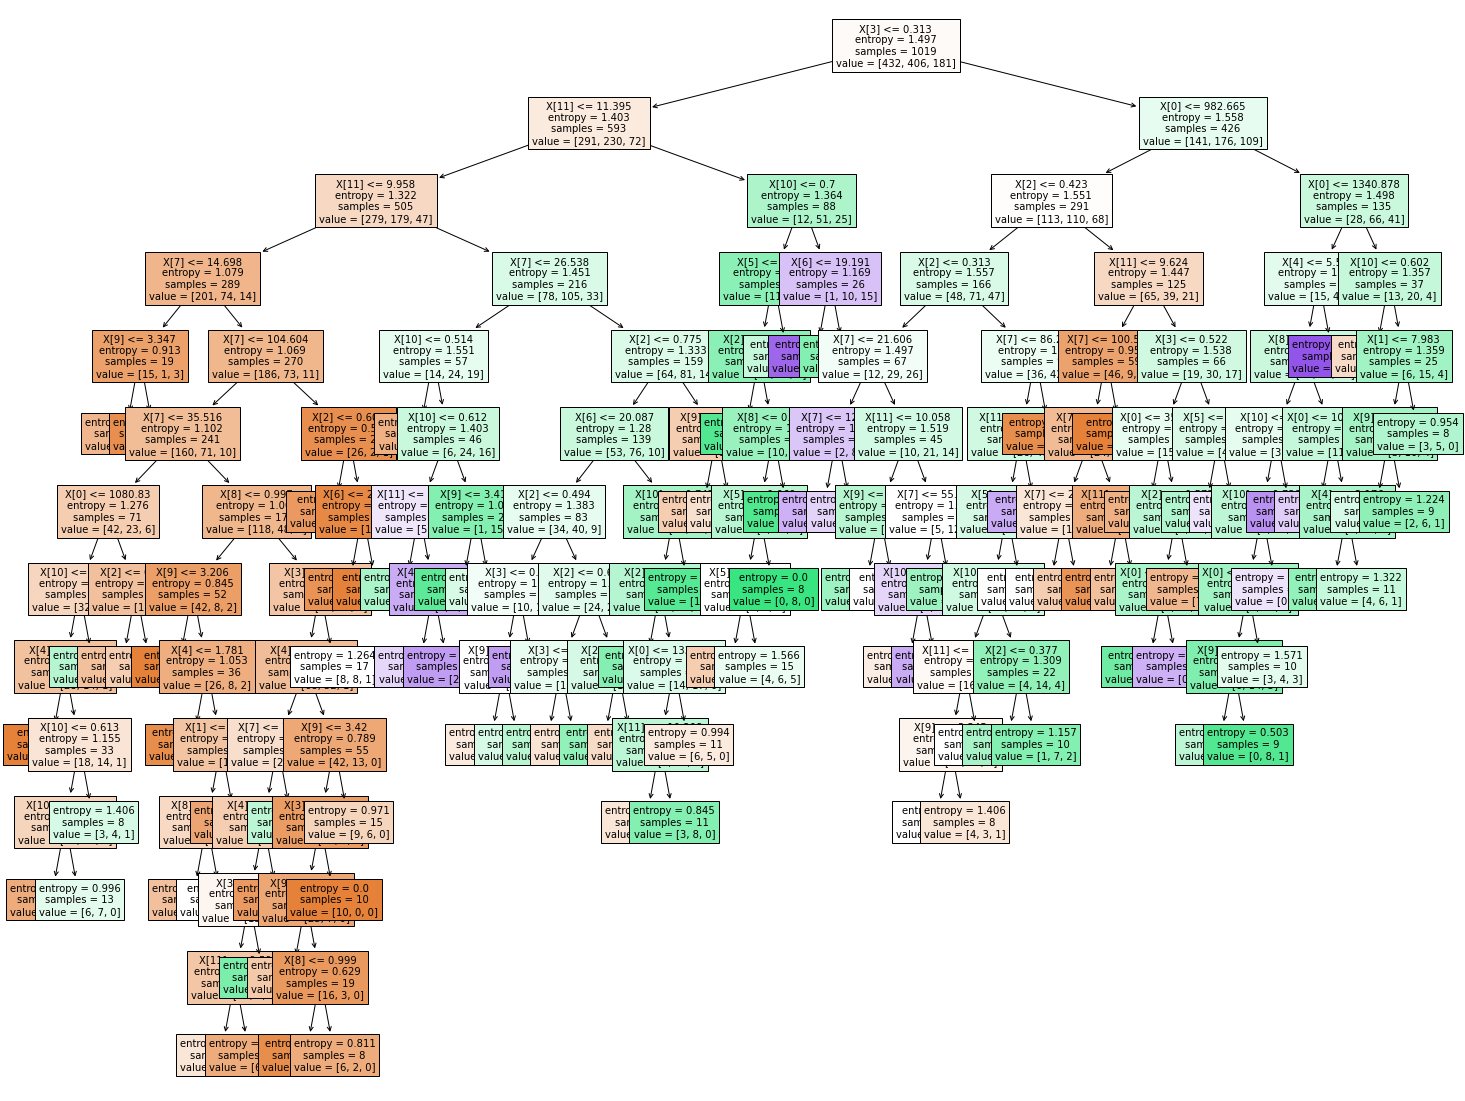

In [31]:
fig = plt.figure(figsize=(25,20))
clf = dtc_best_para.fit(X_train, y_train)
tree.plot_tree(clf, filled=True, fontsize=10)
plt.show();

Gini index and entropy is the criterion for calculating information gain. Decision tree algorithms use information gain to split a node. Both gini and entropy are measures of impurity of a node. A node having multiple classes is impure whereas a node having only one class is pure.

# <span style="color:red"> 7.2 Hyper-Parameter Tuning Logistic Regression Model </span>

In [32]:
log_reg=LogisticRegression()
log_reg

LogisticRegression()

Solver Options:

newton-cg — A newton method. Newton methods use an exact Hessian explicitly which can be computationally expensive in high dimensionsios.

lbfgs — Stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno

liblinear — Library for Large Linear Classification.

sag — Stochastic Average Gradient descent.

saga — Extension of sag that also allows for L1 regularization.

The numpy.logspace() function returns number spaces evenly w.r.t interval on a log scale.

In [51]:
grid_param = {
    "penalty" : ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 3),
    "solver": ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter' : [100, 200]
}

In [52]:
#The verbose option specifies that you want to display detailed processing information on your screen. verbose: 'auto', 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch
grid= GridSearchCV(estimator=log_reg, param_grid=grid_param,verbose=1,cv=2)

In [53]:
grid.fit(X_train1,y_train1)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-04, 1.e+00, 1.e+04]),
                         'max_iter': [100, 200],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             verbose=1)

In [54]:
grid.best_params_

{'C': 1.0, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}

In [55]:
grid.best_estimator_

LogisticRegression(max_iter=200, penalty='l1', solver='saga')

In [56]:
log_reg_best_par = LogisticRegression(max_iter=200, penalty='l1', solver='saga')
log_reg_best_par

LogisticRegression(max_iter=200, penalty='l1', solver='saga')

In [57]:
log_reg_best_par.fit(X_train1,y_train1)

LogisticRegression(max_iter=200, penalty='l1', solver='saga')

In [58]:
log_reg_best_par_pred =log_reg_best_par.predict(X_test1)
log_reg_best_par_pred

array([6, 5, 6, 5, 6, 6, 5, 6, 6, 9, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5,
       6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5,
       5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 9, 5, 6, 5, 6, 9, 6, 5, 9,
       5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6,
       5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 9, 6, 5, 5, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 9, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6,
       6, 9, 5, 9, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 9,
       9, 6, 6, 5, 9, 5, 9, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5,
       6, 6, 6, 9, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 9, 6,
       5, 6, 5, 5, 5, 6, 6, 6, 6, 9, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 6, 5, 9, 6, 5, 6, 5, 6, 6, 6, 6, 6, 9, 6, 9, 6, 6, 6, 6,
       5, 6, 6, 9, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 6, 6, 5, 6,
       5, 6, 5, 6, 5, 5, 9, 6, 6, 6, 5, 6, 6, 9, 6,

In [59]:
print(classification_report(y_test1,log_reg_best_par_pred))

              precision    recall  f1-score   support

           5       0.63      0.69      0.66       145
           6       0.50      0.61      0.55       129
           9       0.52      0.18      0.27        66

    accuracy                           0.56       340
   macro avg       0.55      0.49      0.49       340
weighted avg       0.56      0.56      0.54       340



# <span style="color:red"> 7.3 Hyper-Parameter Tuning Support Vector Classifier Model </span>

In [60]:
svc=SVC()
svc

SVC()

Kernels are used in Support Vector Machines (SVMs) to solve regression and classification problems. 
Support Vector Machines use the Kernel Trick to transform linearly inseparable data into linearly separable data, thus finding an optimal boundary for possible outputs.

popular kernels are: 

Polynomial Kernel, Gaussian Kernel, Radial Basis Function (RBF), Laplace RBF Kernel, Sigmoid Kernel, Anove RBF Kernel, etc

In [61]:
grid_param = {
              'C' : [10,100,200,500],
              'degree':[2,3,4,5],
              'kernel':['rbf','poly','sigmoid']
               }

In [62]:
grid= GridSearchCV(estimator=svc,param_grid=grid_param,verbose=1,cv=2)

In [63]:
grid.fit(X_train1,y_train1)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [10, 100, 200, 500], 'degree': [2, 3, 4, 5],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=1)

In [64]:
grid.best_params_

{'C': 10, 'degree': 3, 'kernel': 'poly'}

In [65]:
grid.best_estimator_

SVC(C=10, kernel='poly')

In [66]:
grid.best_par = SVC(C=10, kernel='poly')
grid.best_par

SVC(C=10, kernel='poly')

In [67]:
grid.best_par.fit(X_train1,y_train1)

SVC(C=10, kernel='poly')

In [68]:
grid.best_par_pred = grid.best_par.predict(X_test1)
grid.best_par_pred

array([9, 6, 5, 5, 9, 5, 5, 6, 6, 9, 5, 5, 6, 5, 5, 6, 6, 5, 9, 6, 6, 6,
       6, 5, 6, 5, 5, 6, 5, 6, 9, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 9, 5, 6, 6, 6, 9, 6, 6, 6,
       5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 9,
       9, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 9, 5, 6, 9, 6, 5, 6, 5, 5, 6, 6,
       5, 5, 9, 5, 6, 5, 9, 9, 5, 5, 9, 6, 5, 5, 5, 9, 5, 6, 5, 6, 6, 6,
       6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6,
       6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 9, 6, 9, 6,
       6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 9, 6, 6, 5, 9, 6, 5, 5, 5, 5, 9, 6,
       6, 6, 5, 5, 5, 6, 6, 6, 6, 9, 5, 5, 5, 6, 6, 5, 5, 5, 5, 9, 5, 5,
       5, 6, 6, 6, 5, 9, 5, 5, 6, 5, 9, 6, 6, 9, 6, 6, 6, 9, 6, 6, 6, 6,
       5, 5, 6, 9, 5, 6, 6, 6, 9, 6, 6, 6, 9, 6, 9, 6, 6, 9, 6, 6, 6, 6,
       5, 6, 5, 6, 5, 5, 6, 9, 6, 6, 5, 6, 9, 6, 6,

In [71]:
print(classification_report(y_test1,grid.best_par_pred))

              precision    recall  f1-score   support

           5       0.62      0.66      0.64       145
           6       0.53      0.62      0.57       129
           9       0.50      0.29      0.37        66

    accuracy                           0.57       340
   macro avg       0.55      0.52      0.53       340
weighted avg       0.57      0.57      0.56       340



# <span style="color:red"> 7.4 Hyper-Parameter Tuning Random Forest Classifier Model </span>

In [72]:
Rand_for = RandomForestClassifier()
Rand_for

RandomForestClassifier()

In [92]:
grid_param = {
    "n_estimators" : [90,100,110],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,2),
    'min_samples_leaf' : range(1,10,2),
}


In [97]:
grid=GridSearchCV(estimator=Rand_for,param_grid=grid_param, verbose=1, cv=2)

In [98]:
grid.fit(X_train,y_train)

Fitting 2 folds for each of 270 candidates, totalling 540 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(1, 10, 2),
                         'n_estimators': [90, 100, 110]},
             verbose=1)

In [99]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'n_estimators': 110}

In [100]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,
                       n_estimators=110)

In [105]:
grid.best_par= RandomForestClassifier(criterion='entropy', max_depth=8,n_estimators=110)
grid.best_par

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=110)

In [106]:
grid.best_par.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=110)

In [107]:
grid.best_par_pred = grid.best_par.predict(X_test)
grid.best_par_pred

array([9, 6, 6, 5, 6, 5, 5, 6, 6, 9, 5, 5, 6, 5, 5, 6, 6, 5, 9, 6, 5, 6,
       6, 5, 6, 5, 5, 6, 5, 6, 9, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5,
       5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 9, 5, 6, 5, 5, 9, 5, 6, 6,
       5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 9,
       5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6,
       5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 9, 5, 6, 9, 6, 5, 6, 5, 5, 6, 5,
       5, 5, 9, 5, 5, 5, 5, 9, 6, 6, 9, 6, 5, 5, 5, 6, 5, 6, 5, 9, 6, 5,
       5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6,
       9, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 9, 9, 9, 5,
       6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 9, 5, 5, 5, 6, 6, 6,
       5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5,
       5, 6, 9, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 9, 6, 9, 6, 9, 6, 6, 5, 5,
       6, 6, 6, 9, 5, 6, 6, 6, 9, 6, 6, 6, 9, 6, 6, 5, 6, 9, 5, 6, 5, 6,
       5, 6, 5, 5, 5, 5, 5, 9, 6, 6, 5, 6, 9, 5, 6,

In [108]:
print(classification_report(y_test,grid.best_par_pred))

              precision    recall  f1-score   support

           5       0.65      0.72      0.68       145
           6       0.53      0.60      0.57       129
           9       0.58      0.27      0.37        66

    accuracy                           0.59       340
   macro avg       0.59      0.53      0.54       340
weighted avg       0.59      0.59      0.58       340

